<b>Library Imports

In [38]:
# 📦 Data Processing
import pandas as pd
import numpy as np

# 📊 Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from plottable import Table
from plottable import ColumnDefinition
from matplotlib.cm import plasma
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# 📐 Statistics & Machine Learning
from scipy.stats import spearmanr, anderson
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# 📈 Matplotlib Styling & Annotation (jika dipakai)
from matplotlib.ticker import FormatStrFormatter, FuncFormatter
from matplotlib.patches import FancyArrowPatch
from matplotlib.font_manager import FontProperties
from highlight_text import fig_text, ax_text

# 🧮 Notebook Settings
%matplotlib inline

  -----------------------------------------------------------------------------------------------------------------

<b>  Load Dataset

In [2]:
df_musim=pd.read_csv('.....weather_classification_data.csv')

-------------------------------------------------------------------------------------------------------------------

<b> Data Screning 

In [3]:
print("Dimensi dataset:", df_musim.shape)

Dimensi dataset: (13200, 11)


In [4]:
print("\nInformasi dataset:\n", df_musim.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB

Informasi dataset:
 None


In [5]:
print("\nDeskripsi statistik dataset:\n", df_musim.describe())


Deskripsi statistik dataset:
         Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800000      

In [6]:
df_musim.head()

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy

-------------------------------------------------------------------------------------------------------------------

<b> Filtered Data Type Object

In [7]:
df_sub=df_musim[['Temperature','Humidity','Wind Speed',	'Precipitation (%)','Atmospheric Pressure','UV Index','Visibility (km)'	]]
df_sub

Temperature  Humidity  Wind Speed  Precipitation (%)  \
0             14.0        73         9.5               82.0   
1             39.0        96         8.5               71.0   
2             30.0        64         7.0               16.0   
3             38.0        83         1.5               82.0   
4             27.0        74        17.0               66.0   
...            ...       ...         ...                ...   
13195         10.0        74        14.5               71.0   
13196         -1.0        76         3.5               23.0   
13197         30.0        77         5.5               28.0   
13198          3.0        76        10.0               94.0   
13199         -5.0        38         0.0               92.0   

       Atmospheric Pressure  UV Index  Visibility (km)  
0                   1010.82         2              3.5  
1                   1011.43         7             10.0  
2                   1018.72         5              5.5  
3                   1026.25         7              1.0  
4                    990.67         1              2.5  
...                     ...       ...              ...  
13195               1003.15         1              1.0  
13196               1067.23         1              6.0  
13197               1012.69         3              9.0  
13198                984.27         0              2.0  
13199               1015.37         5             10.0  

[13200 rows x 7 columns]

--------------------------------------------------------------------------------------------------------------------------------------------------------

<b> Uji Normalitas 
> Uji normalitas dengan melihat distribusi KDE

In [8]:
# Data
suhu = df_musim['Temperature']
kelembapan = df_musim['Humidity']
kec_angin=df_musim['Wind Speed']
ketebalan=df_musim['Precipitation (%)']
tekanan=df_musim['Atmospheric Pressure']
uv=df_musim['UV Index']
jarak=df_musim['Visibility (km)']

plasma_colors = [mcolors.to_hex(cm.plasma(i / 6)) for i in range(7)]

# Buat distplot masing-masing
dist_temp = ff.create_distplot([suhu], group_labels=['Temperature'], show_hist=True, show_rug=False, colors=[plasma_colors[0]])
dist_humid = ff.create_distplot([kelembapan], group_labels=['Humidity'], show_hist=True, show_rug=False, colors=[plasma_colors[1]])
dist_wind = ff.create_distplot([kec_angin], group_labels=['Wind Speed'], show_hist=True, show_rug=False, colors=[plasma_colors[2]])
dist_prec = ff.create_distplot([ketebalan], group_labels=['Precipitation (%)'], show_hist=True, show_rug=False, colors=[plasma_colors[3]])
dist_pres = ff.create_distplot([tekanan], group_labels=['Atmospheric Pressure'], show_hist=True, show_rug=False, colors=[plasma_colors[4]])
dist_uv = ff.create_distplot([uv], group_labels=['UV Index'], show_hist=True, show_rug=False, colors=[plasma_colors[5]])
dist_vis = ff.create_distplot([jarak], group_labels=['Visibility (km)'], show_hist=True, show_rug=False, colors=[plasma_colors[3]])


# Buat figure dengan 2 subplot
fig = make_subplots(rows=4, cols=2, subplot_titles=("Temperature","Humidity","Wind Speed",	"Precipitation (%)","Atmospheric Pressure","UV Index","Visibility (km)"))

distplots = [dist_temp, dist_humid, dist_wind, dist_prec, dist_pres, dist_uv, dist_vis]
positions = [(1,1), (1,2), (2,1), (2,2), (3,1), (3,2), (4,1)]

for dist, (r, c) in zip(distplots, positions):
    for trace in dist['data']:
        trace.showlegend = False
        fig.add_trace(trace, row=r, col=c)

# Layout dan tampilkan
fig.update_layout(height=900, width=1000, title_text="<b>Uji Normalitas: Distribusi KDE")
fig.write_html( r'C:/Users/Dinda.D.L/OneDrive - uny.ac.id/Dokumen//pORTO 2/Uji Normalitas KDE.html', include_plotlyjs='cdn')
fig.show()


--------------------------------------------------------------------------------------------------------------------------------------------------------

<b> Uji Normalitas Secara Statistik
> Pengujian dilakukan dengan mengguanakan metode Anderson

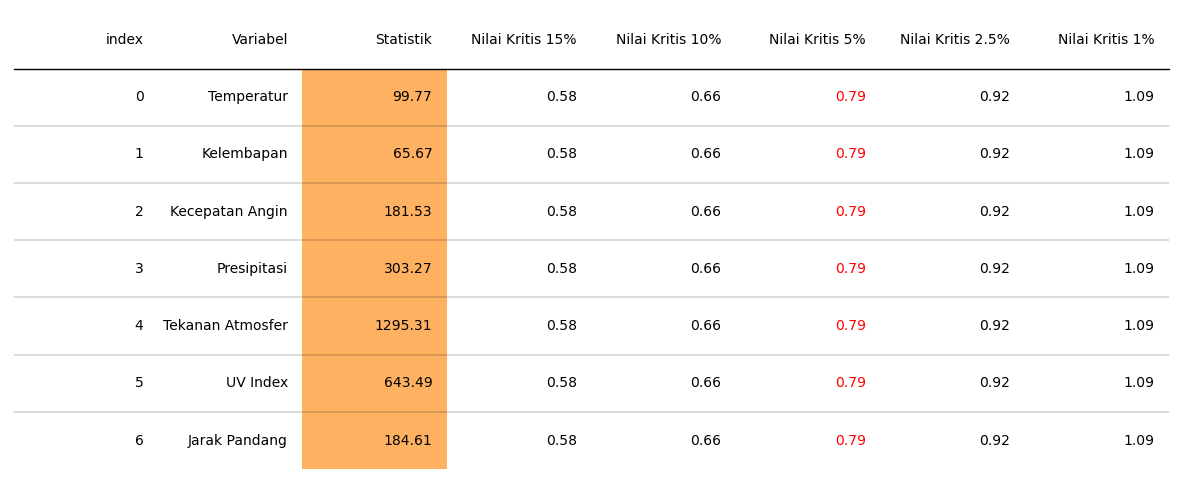

In [9]:
# Daftar variabel dan labelnya
variabels = {
    'Temperature': 'Temperatur',
    'Humidity': 'Kelembapan',
    'Wind Speed': 'Kecepatan Angin',
    'Precipitation (%)': 'Presipitasi',
    'Atmospheric Pressure': 'Tekanan Atmosfer',
    'UV Index': 'UV Index',
    'Visibility (km)': 'Jarak Pandang'
}

# List untuk menyimpan hasil
hasil_anderson = []

# Looping uji Anderson
for col, label in variabels.items():
    result = anderson(df_musim[col])
    hasil_anderson.append({
        "Variabel": label,
        "Statistik": result.statistic,
        "Nilai Kritis 15%": result.critical_values[0],
        "Nilai Kritis 10%": result.critical_values[1],
        "Nilai Kritis 5%": result.critical_values[2],
        "Nilai Kritis 2.5%": result.critical_values[3],
        "Nilai Kritis 1%": result.critical_values[4]
    })

# Buat DataFrame
tabel_anderson = pd.DataFrame(hasil_anderson).round(2)

# Init a figure 
fig, ax = plt.subplots(figsize=(15, 6))

# Create the Table() object
tab= Table(tabel_anderson)
tab.columns['Statistik'].set_facecolor("#ffb162")
tab.columns['Nilai Kritis 5%'].set_fontcolor("red")

plt.savefig(r'C:/Users/Dinda.D.L/OneDrive - uny.ac.id/Dokumen/Porto 2/Uji Normalitas Statistik.jpg')
plt.show()

--------------------------------------------------------------------------------------------------------------------------------------------------------
<b> Analisis Korelasi
> Karena dari hasil uji normalitas baik hasil distribusi KDE maupun statistik, data yang tersedia bukan merupakan data terdistribusi normal. Sehingga, analisis korelasi dilakukan dengan menggunakan metode Spearman

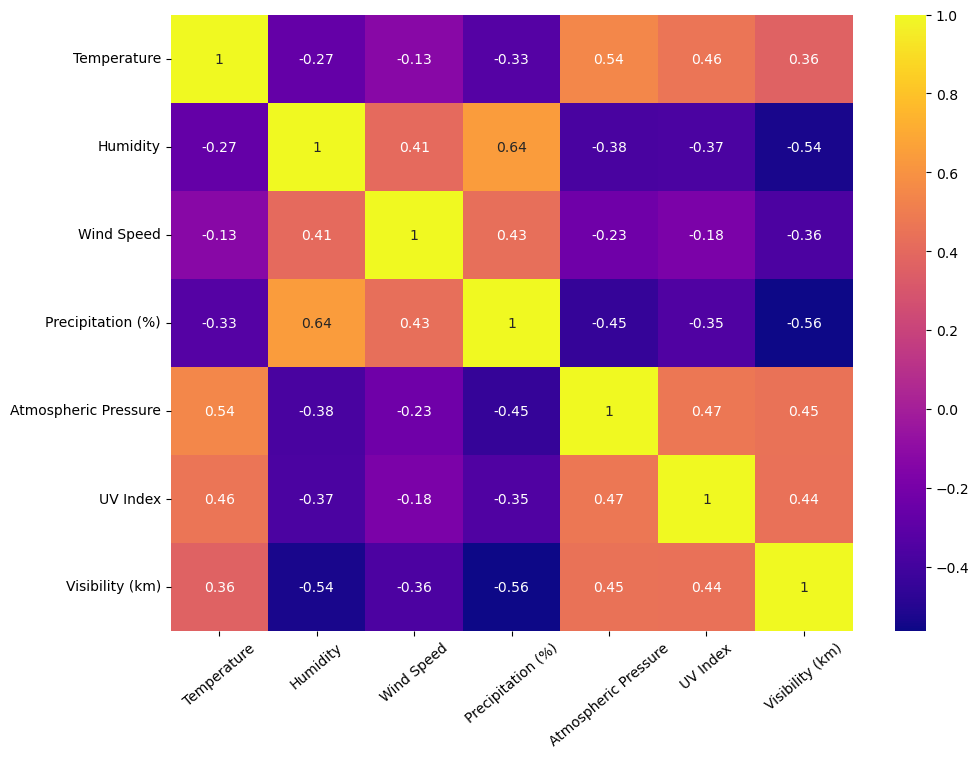

In [10]:
# Hitung korelasi dan buat heatmap
corr = df_sub.corr(method='spearman')

plt.figure(figsize=(11, 8))
g = sns.heatmap(corr, cmap="plasma", annot=True)

# Rotasi label sumbu X
plt.xticks(rotation=40)

# Simpan gambar
plt.savefig(r'C:/Users/Dinda.D.L/OneDrive - uny.ac.id/Dokumen/Porto 2/Korelasi Spearman.jpg')
# Tampilkan plot
plt.show()

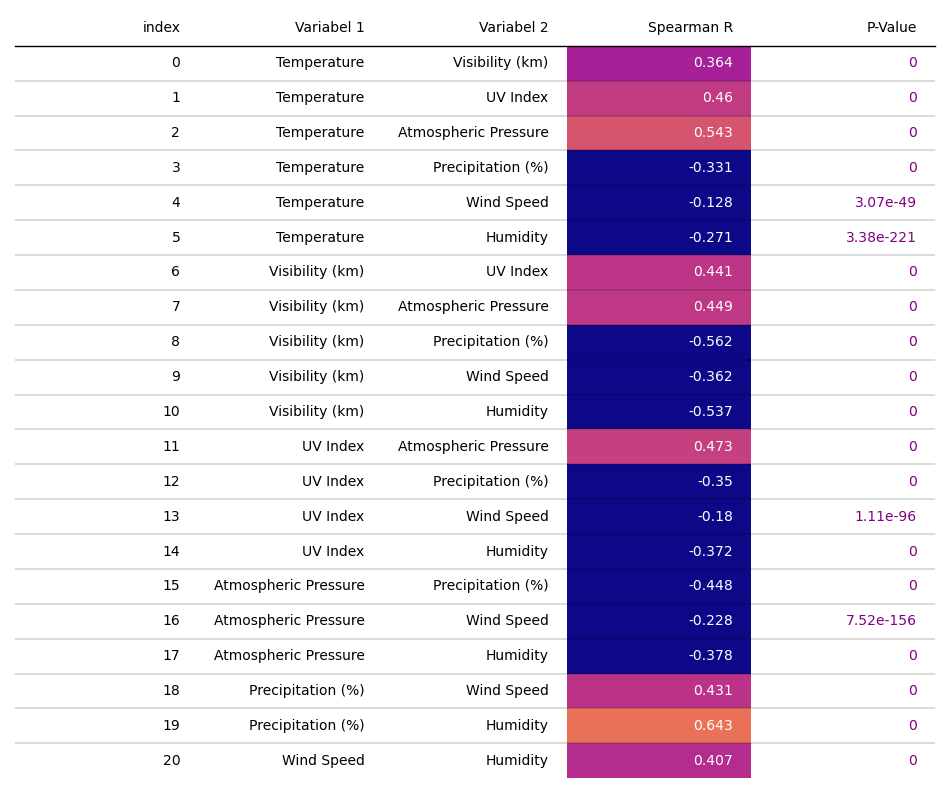

In [11]:
correlation_targets = {
    'Temperature': ['Visibility (km)', 'UV Index', 'Atmospheric Pressure', 'Precipitation (%)', 'Wind Speed', 'Humidity'],
    'Visibility (km)': ['UV Index', 'Atmospheric Pressure', 'Precipitation (%)', 'Wind Speed', 'Humidity'],
    'UV Index': ['Atmospheric Pressure', 'Precipitation (%)', 'Wind Speed', 'Humidity'],
    'Atmospheric Pressure': ['Precipitation (%)', 'Wind Speed', 'Humidity'],
    'Precipitation (%)': ['Wind Speed', 'Humidity'],
    'Wind Speed': ['Humidity']
}

# Simpan hasil dalam list
results = []

# Loop efisien
for target, compare_cols in correlation_targets.items():
    for col in compare_cols:
        coef, pval = spearmanr(df_musim[target], df_musim[col])
        results.append({
            'Variabel 1': target,
            'Variabel 2': col,
            'Spearman R': round(coef, 3),
            'P-Value': f"{pval:.3g}"
        })

# Buat DataFrame hasil akhir
df_corr = pd.DataFrame(results)

# Init a figure 
fig, ax = plt.subplots(figsize=(12, 10))

# Create the Table() object
tab = Table(df_corr,
            column_definitions=[ColumnDefinition(name="Spearman R", cmap=plasma)])
tab.columns['P-Value'].set_fontcolor("purple")
tab.columns['Spearman R'].set_fontcolor("white")
plt.savefig(r'C:/Users/Dinda.D.L/OneDrive - uny.ac.id/Dokumen/Porto 2/Pvalue.jpg')
plt.show()



-------------------------------------------------------------------------------------------------------------------------------------------------------------
<b> Normalisasi Data 
> Normalisiasi data dilakukan agar ukuran data seragam. Normalisasi data menggunakan metode Min-Max

In [12]:
scaler = StandardScaler()
sub_normalized = scaler.fit_transform(df_sub)
print(sub_normalized)

[[-0.29493119  0.21240351 -0.04808565 ...  0.13420291 -0.52010407
  -0.58223095]
 [ 1.14303484  1.35138482 -0.19283608 ...  0.15060156  0.77642368
   1.34576796]
 [ 0.62536707 -0.23328483 -0.40996172 ...  0.34657889  0.25781258
   0.01099948]
 ...
 [ 0.62536707  0.41048722 -0.62708737 ...  0.18447418 -0.26079852
   1.04915274]
 [-0.92763624  0.36096629  0.02428956 ... -0.5795417  -1.03871517
  -1.02715378]
 [-1.38778537 -1.52082893 -1.42321472 ...  0.25652072  0.25781258
   1.34576796]]


-------------------------------------------------------------------------------------------------------------------------------------------------------------
<b> Filtering Data Mengguanakan DBscan 
> Menentukan Eps terbaik menggunakan Elbow Method

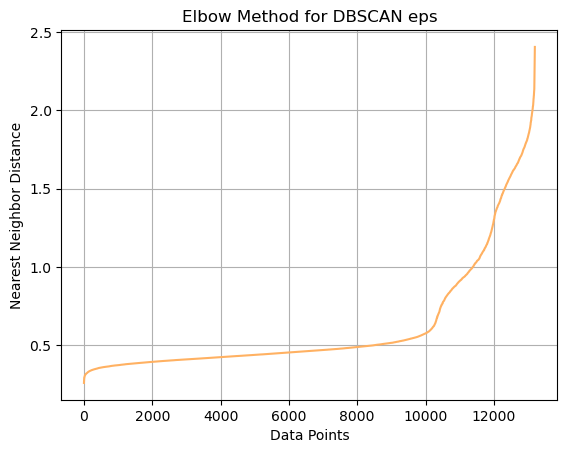

In [13]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(sub_normalized)
distances, indices = neighbors_fit.kneighbors(sub_normalized)

distances = np.sort(distances[:, 4])  # Ambil k jarak terjauh (ke-5)
plt.plot(distances, color="#ffb162")
plt.xlabel('Data Points')
plt.ylabel('Nearest Neighbor Distance')
plt.title('Elbow Method for DBSCAN eps')
plt.grid(True)
plt.show()


In [14]:
hasil=df_musim[['Temperature','Humidity','Wind Speed',	'Precipitation (%)','Atmospheric Pressure','UV Index','Visibility (km)'	]]
hasil_lengkap=df_musim[['Temperature','Humidity','Wind Speed','Precipitation (%)','Cloud Cover','Atmospheric Pressure','UV Index','Season','Visibility (km)','Location','Weather Type']]

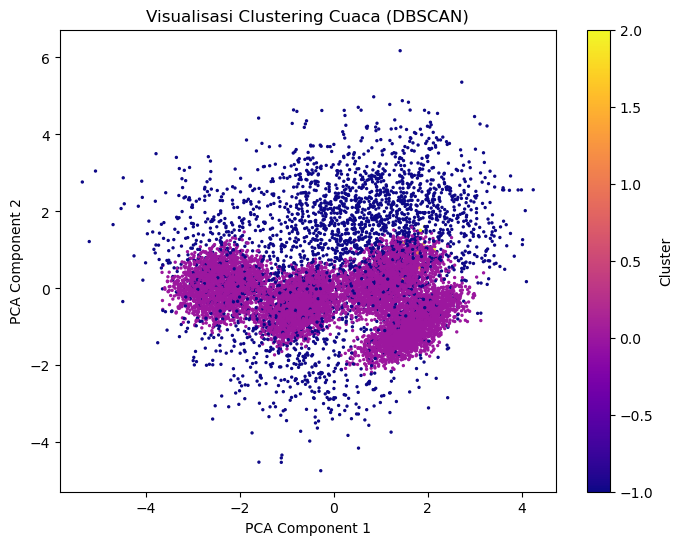

In [15]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.6, min_samples=5)  # bisa kamu atur sesuai tuning
dbscan_labels = dbscan.fit_predict(sub_normalized)

# Simpan hasil cluster
hasil['Cluster'] = dbscan_labels
hasil_lengkap['Cluster'] = dbscan_labels

# PCA untuk visualisasi
pca = PCA(n_components=2)
pca_components = pca.fit_transform(sub_normalized)

# Visualisasi
plt.figure(figsize=(8,6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=dbscan_labels, cmap='plasma', s=2)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Visualisasi Clustering Cuaca (DBSCAN)')
plt.colorbar(label='Cluster')
plt.show()


In [16]:
hasil.head()

Temperature  Humidity  Wind Speed  Precipitation (%)  Atmospheric Pressure  \
0         14.0        73         9.5               82.0               1010.82   
1         39.0        96         8.5               71.0               1011.43   
2         30.0        64         7.0               16.0               1018.72   
3         38.0        83         1.5               82.0               1026.25   
4         27.0        74        17.0               66.0                990.67   

   UV Index  Visibility (km)  Cluster  
0         2              3.5        0  
1         7             10.0       -1  
2         5              5.5        0  
3         7              1.0       -1  
4         1              2.5        0

> Menghilankan cluster -1 yang di anggap sebagai noise

In [17]:
filtered_data = hasil[hasil['Cluster'] != -1]
filtered_data = filtered_data.drop(columns='Cluster')
filtered_data.head()

Temperature  Humidity  Wind Speed  Precipitation (%)  Atmospheric Pressure  \
0         14.0        73         9.5               82.0               1010.82   
2         30.0        64         7.0               16.0               1018.72   
4         27.0        74        17.0               66.0                990.67   
5         32.0        55         3.5               26.0               1010.03   
6         -2.0        97         8.0               86.0                990.87   

   UV Index  Visibility (km)  
0         2              3.5  
2         5              5.5  
4         1              2.5  
5         2              5.0  
6         1              4.0

In [18]:
hasil_lengkap.head()

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  Cluster  
0        Rainy        0  
1       Cloudy       -1  
2        Sunny        0  
3        Sunny       -1  
4        Rainy        0

In [19]:
filtered_data_lengkap = hasil_lengkap[hasil_lengkap['Cluster'] != -1]
filtered_data_lengkap= filtered_data_lengkap.drop(columns='Cluster')
filtered_data_lengkap.head()

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
4         27.0        74        17.0               66.0       overcast   
5         32.0        55         3.5               26.0       overcast   
6         -2.0        97         8.0               86.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
2               1018.72         5  Spring              5.5  mountain   
4                990.67         1  Winter              2.5  mountain   
5               1010.03         2  Summer              5.0    inland   
6                990.87         1  Winter              4.0    inland   

  Weather Type  
0        Rainy  
2        Sunny  
4        Rainy  
5       Cloudy  
6        Snowy

-------------------------------------------------------------------------------------------------------------------------------------------------------------
<b> Normalisasi Data 
> Normalisiasi data dilakukan agar ukuran data seragam. Normalisasi data menggunakan metode Min-Max

In [20]:
scaler = StandardScaler()
sub_normalized2 = scaler.fit_transform(filtered_data)
print(sub_normalized2)

[[-0.28353098  0.29519199  0.13473069 ...  0.3742024  -0.34556676
  -0.6504992 ]
 [ 0.81458943 -0.18851339 -0.34166817 ...  0.99871712  0.59582779
   0.15944991]
 [ 0.60869186  0.34893704  1.56392728 ... -1.21870541 -0.65936494
  -1.05547375]
 ...
 [-0.55806109  0.34893704  1.08752842 ... -0.23213025 -0.65936494
  -1.66293559]
 [ 0.81458943  0.51017216 -0.62750749 ...  0.52203057 -0.03176857
   1.57686085]
 [-1.03848877  0.45642712  0.23001046 ... -1.72464138 -0.97316312
  -1.25796103]]


-------------------------------------------------------------------------------------------------------------------------------------------------------------
<b> Clustering Data Menggunakan K-Means Clustering
> Data dikelompokan menjadi beberapa kluster

In [21]:
sse = []
index = range(1,15)
for i in index :
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(sub_normalized2)
  sse_=kmeans.inertia_
  sse.append(sse_)

C:\Users\Dinda.D.L\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "C:\Users\Dinda.D.L\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


> Menentukan jumlah kluster terbaik mengguanakn Metode Elbow

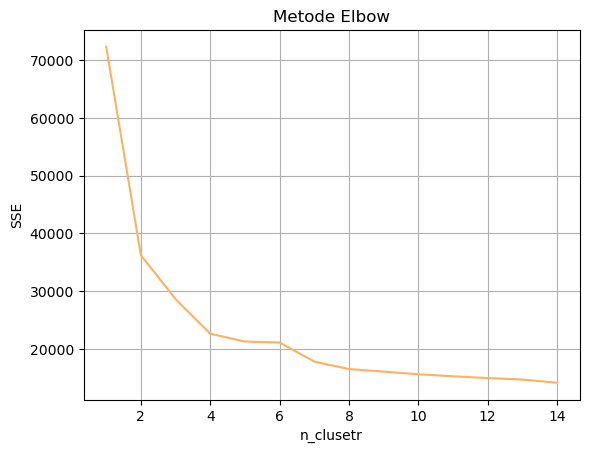

In [22]:
plt.plot(index,sse, color="#ffb162")
plt.title('Metode Elbow')
plt.xlabel('n_clusetr')
plt.ylabel('SSE')
plt.savefig(r'C:/Users/Dinda.D.L/OneDrive - uny.ac.id/Dokumen/Porto 2/Elbow.jpg')
plt.grid(True)
plt.show()

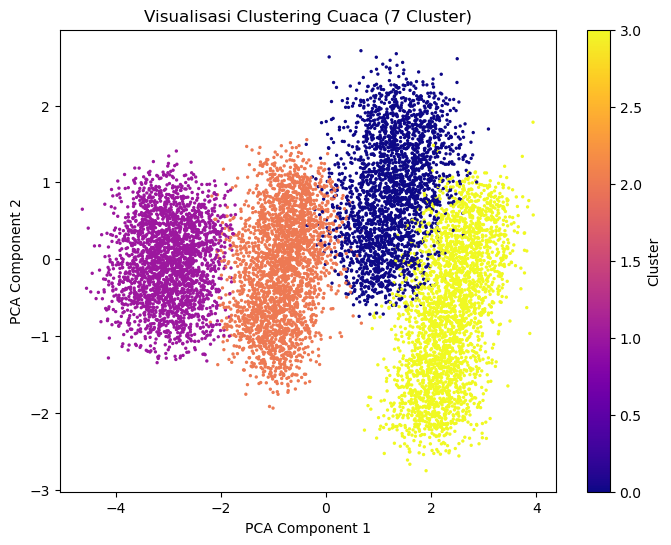

In [34]:
# Misal hasil dari elbow menunjukkan 6 cluster adalah yang terbaik
kmeans = KMeans(n_clusters=4, random_state=25)
kmeans.fit(sub_normalized2)
kmeans_labels = kmeans.labels_

# Tambahkan hasil cluster ke DataFrame
filtered_data_lengkap['Cluster'] = kmeans_labels
filtered_data['Cluster']= kmeans_labels


pca = PCA(n_components=2)
pca_components = pca.fit_transform(sub_normalized2)


plt.figure(figsize=(8,6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=kmeans_labels, cmap='plasma', s=2)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Visualisasi Clustering Cuaca (7 Cluster)')
plt.colorbar(label='Cluster')
plt.savefig(r'C:/Users/Dinda.D.L/OneDrive - uny.ac.id/Dokumen/Porto 2/Klasterisasi PCA.jpg')
plt.show()


In [24]:
filtered_data.head()

Temperature  Humidity  Wind Speed  Precipitation (%)  Atmospheric Pressure  \
0         14.0        73         9.5               82.0               1010.82   
2         30.0        64         7.0               16.0               1018.72   
4         27.0        74        17.0               66.0                990.67   
5         32.0        55         3.5               26.0               1010.03   
6         -2.0        97         8.0               86.0                990.87   

   UV Index  Visibility (km)  Cluster  
0         2              3.5        2  
2         5              5.5        3  
4         1              2.5        2  
5         2              5.0        3  
6         1              4.0        1

In [25]:
filtered_data_lengkap.head()

Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
4         27.0        74        17.0               66.0       overcast   
5         32.0        55         3.5               26.0       overcast   
6         -2.0        97         8.0               86.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
2               1018.72         5  Spring              5.5  mountain   
4                990.67         1  Winter              2.5  mountain   
5               1010.03         2  Summer              5.0    inland   
6                990.87         1  Winter              4.0    inland   

  Weather Type  Cluster  
0        Rainy        2  
2        Sunny        3  
4        Rainy        2  
5       Cloudy        3  
6        Snowy        1

-------------------------------------------------------------------------------------------------------------------------------------------------------------
<b> Evaluasi Hasil Kluster
> Evaluasi dilakukan untuk melihat kualitas dari kluster yang sudah terbentuk

In [35]:
labels = kmeans_labels

# Hitung evaluasi cluster
silhouette_avg = silhouette_score(sub_normalized2, labels)
dbi = davies_bouldin_score(sub_normalized2, labels)
chi = calinski_harabasz_score(sub_normalized2, labels)

print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Davies-Bouldin Index: {dbi:.3f}")
print(f"Calinski-Harabasz Index: {chi:.3f}")


Silhouette Score: 0.310
Davies-Bouldin Index: 1.256
Calinski-Harabasz Index: 7568.984


-------------------------------------------------------------------------------------------------------------------------------------------------------------
<b> Visualisasi Data Menggunakan Pivot Table
> Data dii buat pivot table agar dapat membandingkan data antar cluster

In [26]:
# Misalnya df_cuaca adalah dataframe kamu yang sudah ada kolom 'Cluster'
nilai_cluster = filtered_data.groupby('Cluster').mean(numeric_only=True)
nilai_cluster=nilai_cluster.round(2)

def custom_table(styler):
    # Apply background gradient per kolom
    for column in styler.data.columns:
        styler.background_gradient(
            cmap="plasma", 
            subset=[column],
            vmin=styler.data[column].min(), 
            vmax=styler.data[column].max()
        )
    
    # Center-align text dan perbesar font
    styler.set_properties(**{'text-align': 'center'}).set_table_styles(
        [{'selector': 'th', 'props': [('text-align', 'center')]}]
    ).set_table_attributes('style="font-size: 14px;"')

    # Tambahkan border tebal untuk baris 'max'
    styler.apply(lambda row: ['border-top: 3px solid white; font-weight: bold' if row.name == 'max' else ''
    for _ in row], axis=1)

    return styler

agg_metrics = nilai_cluster.agg(["max"])
(
    pd.concat([nilai_cluster, agg_metrics])
    .style
    .pipe(custom_table)
    .format("{:.2f}")  
)

In [27]:
pivot_musim = pd.pivot_table(
    filtered_data_lengkap,
    index='Cluster',
    columns='Season',
    aggfunc='size',
    fill_value=0
)
def custom_table(styler):
    # Apply background gradient per kolom
    for column in styler.data.columns:
        styler.background_gradient(
            cmap="plasma", 
            subset=[column],
            vmin=styler.data[column].min(), 
            vmax=styler.data[column].max()
        )
    
    # Center-align text dan perbesar font
    styler.set_properties(**{'text-align': 'center'}).set_table_styles(
        [{'selector': 'th', 'props': [('text-align', 'center')]}]
    ).set_table_attributes('style="font-size: 14px;"')

    # Tambahkan border tebal untuk baris 'max'
    styler.apply(lambda row: ['border-top: 3px solid white; font-weight: bold' if row.name == 'max' else ''
    for _ in row], axis=1)

    return styler

agg_metrics = pivot_musim.agg(["max"])
pd.concat([pivot_musim, agg_metrics]).style.pipe(custom_table)

In [28]:
pivot_musim = pd.pivot_table(
    filtered_data_lengkap,
    index='Cluster',
    columns='Weather Type',
    aggfunc='size',
    fill_value=0
)
def custom_table(styler):
    # Apply background gradient per kolom
    for column in styler.data.columns:
        styler.background_gradient(
            cmap="plasma", 
            subset=[column],
            vmin=styler.data[column].min(), 
            vmax=styler.data[column].max()
        )
    
    # Center-align text dan perbesar font
    styler.set_properties(**{'text-align': 'center'}).set_table_styles(
        [{'selector': 'th', 'props': [('text-align', 'center')]}]
    ).set_table_attributes('style="font-size: 14px;"')

    # Tambahkan border tebal untuk baris 'max'
    styler.apply(lambda row: ['border-top: 3px solid white; font-weight: bold' if row.name == 'max' else ''
    for _ in row], axis=1)

    return styler

agg_metrics = pivot_musim.agg(["max"])
pd.concat([pivot_musim, agg_metrics]).style.pipe(custom_table)

In [29]:
pivot_musim = pd.pivot_table(
    filtered_data_lengkap,
    index='Cluster',
    columns='Cloud Cover',
    aggfunc='size',
    fill_value=0
)
def custom_table(styler):
    # Apply background gradient per kolom
    for column in styler.data.columns:
        styler.background_gradient(
            cmap="plasma", 
            subset=[column],
            vmin=styler.data[column].min(), 
            vmax=styler.data[column].max()
        )
    
    # Center-align text dan perbesar font
    styler.set_properties(**{'text-align': 'center'}).set_table_styles(
        [{'selector': 'th', 'props': [('text-align', 'center')]}]
    ).set_table_attributes('style="font-size: 14px;"')

    # Tambahkan border tebal untuk baris 'max'
    styler.apply(lambda row: ['border-top: 3px solid white; font-weight: bold' if row.name == 'max' else ''
    for _ in row], axis=1)

    return styler

agg_metrics = pivot_musim.agg(["max"])
pd.concat([pivot_musim, agg_metrics]).style.pipe(custom_table)

In [30]:
pivot_musim = pd.pivot_table(
    filtered_data_lengkap,
    index='Cluster',
    columns='Location',
    aggfunc='size',
    fill_value=0
)
def custom_table(styler):
    # Apply background gradient per kolom
    for column in styler.data.columns:
        styler.background_gradient(
            cmap="plasma", 
            subset=[column],
            vmin=styler.data[column].min(), 
            vmax=styler.data[column].max()
        )
    
    # Center-align text dan perbesar font
    styler.set_properties(**{'text-align': 'center'}).set_table_styles(
        [{'selector': 'th', 'props': [('text-align', 'center')]}]
    ).set_table_attributes('style="font-size: 14px;"')

    # Tambahkan border tebal untuk baris 'max'
    styler.apply(lambda row: ['border-top: 3px solid white; font-weight: bold' if row.name == 'max' else ''
    for _ in row], axis=1)

    return styler

agg_metrics = pivot_musim.agg(["max"])
pd.concat([pivot_musim, agg_metrics]).style.pipe(custom_table)